In [27]:
import numpy as np
import pandas as pd
import os

import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, LassoLars, TweedieRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz


In [4]:
%run preprocessing.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SHOW            921 non-null    object
 1   SEASON          921 non-null    object
 2   CONTESTANT      921 non-null    object
 3   ELIMINATION-1   393 non-null    object
 4   ELIMINATION-2   237 non-null    object
 5   ELIMINATION-3   206 non-null    object
 6   ELIMINATION-4   178 non-null    object
 7   ELIMINATION-5   142 non-null    object
 8   ELIMINATION-6   131 non-null    object
 9   ELIMINATION-7   105 non-null    object
 10  ELIMINATION-8   65 non-null     object
 11  ELIMINATION-9   51 non-null     object
 12  ELIMINATION-10  64 non-null     object
 13  DATES-1         54 non-null     object
 14  DATES-2         527 non-null    object
 15  DATES-3         420 non-null    object
 16  DATES-4         349 non-null    object
 17  DATES-5         287 non-null    object
 18  DATES-6   

Model 1: Logistic Regression

In [5]:
df

,Roses from Dates,FIR_encoded,Early_1on1_encoded,Target
352,1,1,1,1
353,1,0,1,1
354,2,0,1,1
355,2,0,0,1
356,2,0,0,1
...,...,...,...,...
916,0,0,0,0
917,0,0,0,0
918,0,0,0,0
919,0,0,0,0


In [6]:
x = df.drop('Target',axis=1)
y = df['Target']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [8]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [9]:
y_pred = lr_model.predict(X_test)

In [10]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       151
           1       0.60      0.86      0.71        14

    accuracy                           0.94       165
   macro avg       0.79      0.90      0.84       165
weighted avg       0.95      0.94      0.94       165



In [11]:
print(mean_squared_error(y_test,y_pred))

0.06060606060606061


Model 2: Random Forest

In [12]:
X2_train, X2_test, y2_train, y2_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [13]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)

In [14]:
clf.fit(X2_train, y2_train)
y2_pred = clf.predict(X2_test)

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(y2_test,y2_pred)

0.9393939393939394

Model 3: Decision Tree

In [17]:
df

,Roses from Dates,FIR_encoded,Early_1on1_encoded,Target
352,1,1,1,1
353,1,0,1,1
354,2,0,1,1
355,2,0,0,1
356,2,0,0,1
...,...,...,...,...
916,0,0,0,0
917,0,0,0,0
918,0,0,0,0
919,0,0,0,0


In [22]:
X3_train, X3_test, y3_train, y3_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [19]:
tree = DecisionTreeClassifier()

In [24]:
tree.fit(X3_train,y3_train)

DecisionTreeClassifier()

In [25]:
y3_pred = tree.predict(X3_test)

In [26]:
accuracy_score(y3_test,y3_pred)

0.9212121212121213

In [28]:
export_graphviz(tree, out_file='tree.dot', feature_names=x.columns, class_names=['0', '1'], filled=True, rounded=True, special_characters=True)


In [29]:
import graphviz

with open('tree.dot', 'r') as dot_file:
    dot_graph = dot_file.read()

graphviz.Source(dot_graph).render(filename='tree.png', format='png')

'tree.png.png'

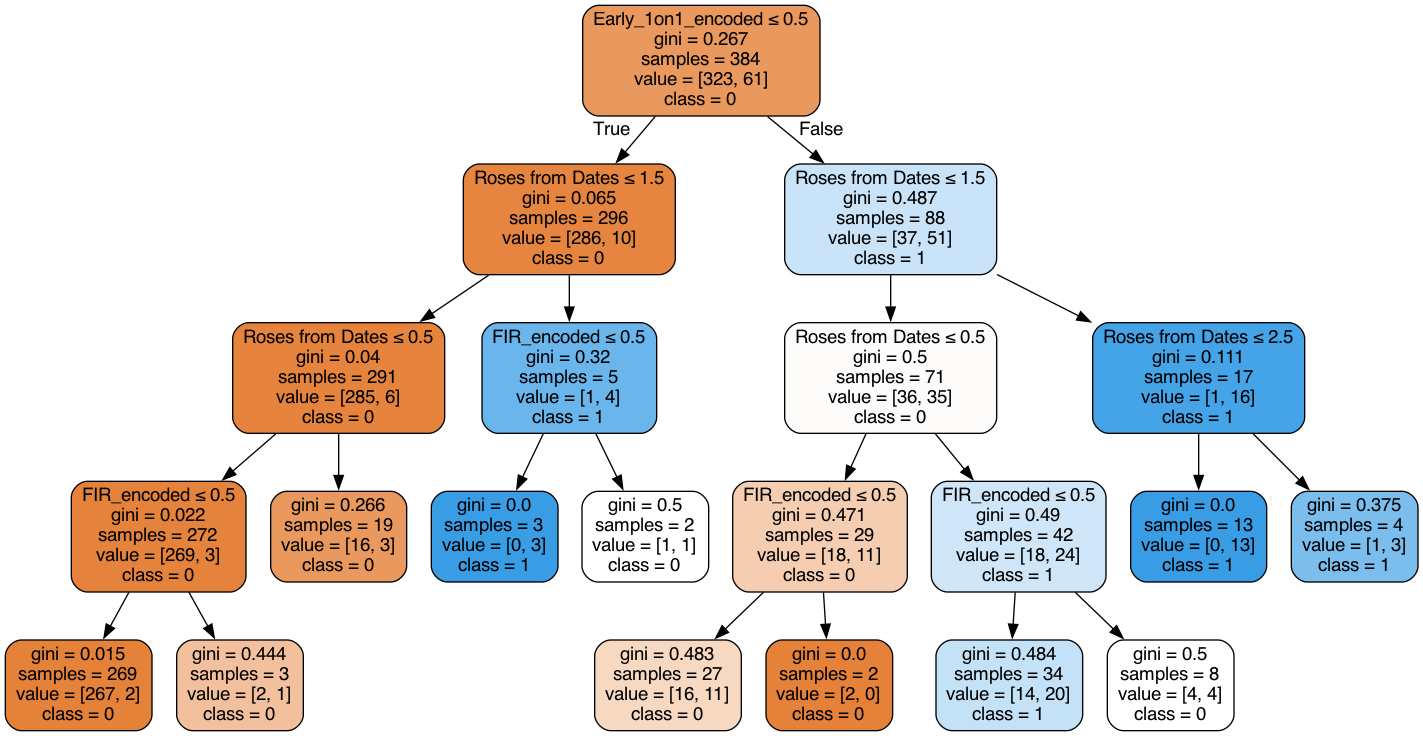

In [31]:
from IPython.display import Image

Image(filename='tree.png.png')

In [33]:
corr_matrix = df.corr()
print(corr_matrix)

                    Roses from Dates  FIR_encoded  Early_1on1_encoded  \
Roses from Dates            1.000000     0.180077            0.586418   
FIR_encoded                 0.180077     1.000000            0.226201   
Early_1on1_encoded          0.586418     0.226201            1.000000   
Target                      0.635254     0.179325            0.610942   

                      Target  
Roses from Dates    0.635254  
FIR_encoded         0.179325  
Early_1on1_encoded  0.610942  
Target              1.000000  
